# Browser Usage Analysis - Solution
Import `pandas` and `pyplot` from matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Extract the data from W3Schools about browser usage over time from the <a href='https://web.archive.org/web/20200930122145/https://www.w3schools.com/browsers/'>Wayback Machine</a> archive

In [10]:
tables = pd.read_html('https://web.archive.org/web/20200930122145/https://www.w3schools.com/browsers/')

Create a column for the year in each of the tables (the values will repeat themselves in each table as each table represnt data from a single year).<br><br>
In addition to that, we would like to merge the columns `IE`, `Edge/IE` and `IE/Edge` together as they are basically the same.<br>Do this by using the ***rename*** method to make sure they are all called "IE" before we combine all the tables together<br>Display the firest table (2019) to preview the data

In [11]:
for table in tables:
    table['Year'] = table.columns[0]
    table.rename(columns = {table.columns[0]: 'Month', 'Edge/IE': 'IE', 'IE/Edge': 'IE'}, inplace = True)
tables[0]

,Month,1,2,Year
0,Aug,SEP,Nov,0
1,NaN,30,NaN,0
2,2019,2020,2021,0


Combine all the tables togetherand display 5 first rows

In [12]:
browser_stats = pd.concat(tables, sort=False)
browser_stats.head()

,Month,1,2,Year,Chrome,IE,Firefox,Safari,Opera,Mozilla,Netscape,AOL
0,Aug,SEP,Nov,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,30,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2020,2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,August,NaN,NaN,2020,81.2 %,4.6 %,7.3 %,3.4 %,2.0 %,NaN,NaN,NaN
1,July,NaN,NaN,2020,81.3 %,4.3 %,7.6 %,3.4 %,2.0 %,NaN,NaN,NaN


Create a new multi-index from the `Year` and `Month` columns

In [13]:
browser_stats.set_index(['Year', 'Month'], inplace = True)
browser_stats.head()

1     2  Chrome     IE Firefox Safari  Opera Mozilla Netscape  \
Year Month                                                                      
0    Aug      SEP   Nov     NaN    NaN     NaN    NaN    NaN     NaN      NaN   
     NaN       30   NaN     NaN    NaN     NaN    NaN    NaN     NaN      NaN   
     2019    2020  2021     NaN    NaN     NaN    NaN    NaN     NaN      NaN   
2020 August   NaN   NaN  81.2 %  4.6 %   7.3 %  3.4 %  2.0 %     NaN      NaN   
     July     NaN   NaN  81.3 %  4.3 %   7.6 %  3.4 %  2.0 %     NaN      NaN   

             AOL  
Year Month        
0    Aug     NaN  
     NaN     NaN  
     2019    NaN  
2020 August  NaN  
     July    NaN

Because of the `%` signs, all our data is in string format. Convert all columns to `float`.<br>**Bonus:** insterad of performing the same operation for each column seperatly, try to use a loop to apply the conversion to all of them at once

In [22]:
browser_stats.columns
browser_stats.drop([1, 2], axis = 1, inplace = True)

In [23]:
for column in browser_stats.columns:
    browser_stats[column] = browser_stats[column].str[:-2]
    browser_stats[column] = browser_stats[column].astype('float')
browser_stats.head()

Chrome    IE  Firefox  Safari  Opera  Mozilla  Netscape  AOL
Year Month                                                                
0    2019        NaN   NaN      NaN     NaN    NaN      NaN       NaN  NaN
     Aug         NaN   NaN      NaN     NaN    NaN      NaN       NaN  NaN
     NaN         NaN   NaN      NaN     NaN    NaN      NaN       NaN  NaN
2002 January     NaN  85.8      NaN     NaN    NaN      NaN       7.9  2.8
     July        NaN  84.5      NaN     NaN    NaN      NaN       7.3  3.5

Sort the index in ascending order so we can plot the data chronologically

In [24]:
browser_stats.sort_index(inplace=True)
browser_stats.head()

Chrome    IE  Firefox  Safari  Opera  Mozilla  Netscape  AOL
Year Month                                                                
0    2019        NaN   NaN      NaN     NaN    NaN      NaN       NaN  NaN
     Aug         NaN   NaN      NaN     NaN    NaN      NaN       NaN  NaN
     NaN         NaN   NaN      NaN     NaN    NaN      NaN       NaN  NaN
2002 January     NaN  85.8      NaN     NaN    NaN      NaN       7.9  2.8
     July        NaN  84.5      NaN     NaN    NaN      NaN       7.3  3.5

To improve the austhetics of our chart, change the notebook's default style to a theme of your choosing (for exmaple - `"bmh"`)

In [25]:
plt.style.use('bmh')

Plot the data in a line chart to show the trend of each browser type over time. Increase the size of the plotting area so it covers the entire width of the notebook and rotate the x labels so they are easier to read

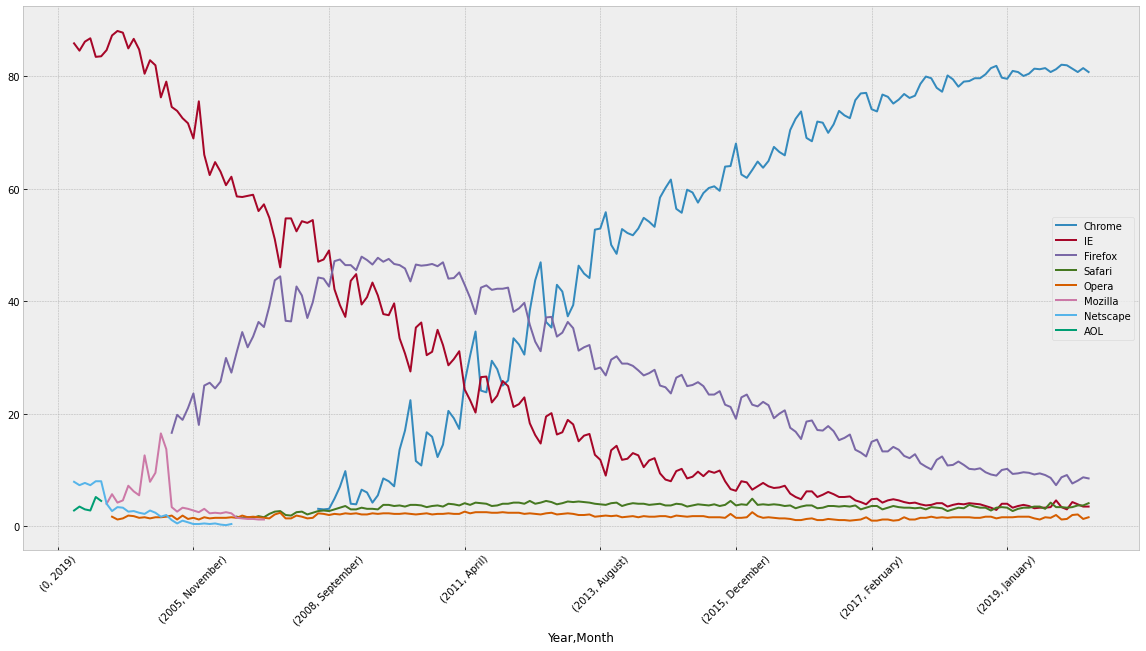

In [27]:
browser_stats.plot.line(figsize = (20,10), rot = 45);